# Model Benchmark

The cleaned and feature processed dataframe is fit into linear regression model. The model performance and prediction is generated. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn import preprocessing

import pickle 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../datasets/df2.csv')
df.head(5)

,resale_price,floor_area_sqft,hdb_age,mid_storey,max_floor_lvl,Mall_Nearest_Distance,Hawker_Nearest_Distance,Tranc_YearMonth,bus_interchange,mrt_nearest_distance,...,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,mrt_no,region_central,region_east,region_north,region_north_east,region_west
0,680000.0,968.760,15,11,25,1094.090418,154.753357,201605,0,330.083069,...,1,0,0,0,1,1,0,0,0,0
1,665000.0,1399.320,34,8,9,866.941448,640.151925,201207,1,903.659703,...,0,1,0,0,2,1,0,0,0,0
2,838000.0,1550.016,24,14,16,1459.579948,1762.082341,201307,1,1334.251197,...,0,0,1,0,1,0,0,0,0,1
3,550000.0,1108.692,29,3,11,950.175199,726.215262,201204,1,907.453484,...,1,0,0,0,2,1,0,0,0,0
4,298000.0,893.412,34,2,4,729.771895,1540.151439,201712,0,412.343032,...,1,0,0,0,1,0,0,1,0,0


---
# Model Prep


In [3]:
# Create Feature Matrix (X) and target vector (Y)
Y = df['resale_price']
X = df.drop(columns=['resale_price'])

In [4]:
# train-test-split into 5-folds
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [5]:
# apply StandardScalar Scaling technique to transform both X_train and X_test
from sklearn.preprocessing import StandardScaler
ss = preprocessing.StandardScaler()
ss.fit(X_train)
#pickle ss for test.csv to use later 
with open('standardscaler.pkl', 'wb') as g:
    pickle.dump(ss, g)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [6]:
# instantiate the models 

# Linear Regression
lr = LinearRegression()

# LassoCV 
#lassocv = LassoCV(n_alphas=200)
lassocv = LassoCV(cv=5)

# RidgeCV
ridgecv = RidgeCV(alphas=np.linspace(.1, 10, 100))

---
# Cross Validation

In [7]:
# Crosss validation of linearRegression
lr_cvs = cross_val_score(lr, X_train_sc, y_train, cv = 5 )

In [8]:
# Crosss validation of Lasso
lasso_cvs = cross_val_score(lassocv, X_train_sc, y_train, cv = 5)

In [9]:
# Crosss validation of Ridge
ridge_cvs = cross_val_score(ridgecv, X_train_sc, y_train, cv = 5)

In [10]:
# CVS mean of the different models
print("Cross Validation Score for different Models")
print(f"LinearRegression - cvs score = {lr_cvs.mean()}")
print(f"Lasso - cvs score = {lasso_cvs.mean()}")
print(f"Ridge - cvs score = {ridge_cvs.mean()}")

Cross Validation Score for different Models
LinearRegression - cvs score = 0.86577534726705
Lasso - cvs score = 0.8657507168987669
Ridge - cvs score = 0.8657747978143846


Evaluation: Since all 3 models give the similar cvs scores, linear regression is chosen as it requires the least processing time (0.9s vs 54.1s and 10.1s for Lasso and Ridge respectively)

In [11]:
ridgecv.fit(X_train_sc, y_train)
ridge_train_score = ridgecv.score(X_train_sc, y_train)
ridge_test_score = ridgecv.score(X_test_sc, y_test)
ridge_alpha = ridgecv.alpha_

In [12]:
lassocv.fit(X_train_sc, y_train)
lasso_train_score = lassocv.score(X_train_sc, y_train)
lasso_test_score = lassocv.score(X_test_sc, y_test)
lasso_alpha = lassocv.alpha_

In [13]:
lr.fit(X_train_sc, y_train)
lr_train_score = lr.score(X_train_sc, y_train)
lr_test_score = lr.score(X_test_sc, y_test)

In [14]:
print(f"Lasso - train score: {lasso_train_score} - test score:{lasso_test_score} - alpha:{lasso_alpha} ")
print(f"Ridge - train score: {ridge_train_score} - test score:{ridge_test_score} - alpha:{ridge_alpha} ")
print(f"LR - train score: {lr_train_score} - test score:{lr_test_score}")

Lasso - train score: 0.8658882194572932 - test score:0.86525690273454 - alpha:93.68396660451363 
Ridge - train score: 0.8659137148428472 - test score:0.8653060043020455 - alpha:2.7 
LR - train score: 0.8659132140518364 - test score:0.8653429799279503


In [15]:
X_sc = ss.transform(X)
Y_lr_predict = lr.predict(X_sc)
Y_lasso_predict = lassocv.predict(X_sc)
Y_ridge_predict = ridgecv.predict(X_sc)
print(f"RMSE Lasso = ",metrics.mean_squared_error(Y, Y_lasso_predict, squared=False) )
print(f"RMSE Ridge = ",metrics.mean_squared_error(Y, Y_ridge_predict, squared=False) )
print(f"RMSE LR = ",metrics.mean_squared_error(Y, Y_lr_predict, squared=False) )

RMSE Lasso =  52505.07547990503
RMSE Ridge =  52499.17229476579
RMSE LR =  52497.814640379576


--- 
Validating the LINE Assumption


In [16]:
def calculate_residuals(model, features, target):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': target, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [17]:
def linear_assumption(model, features, target):
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, target)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)#, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [18]:
def homoscedasticity_assumption(model, features, target):
       
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, target)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_assumption(features, feature_names=None):

    
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

### (L) Linearity - there is linear relationship between the predictors (features) and the response variable (target)
> from the scatter plot between predicted and actual, there is evenly spread along the diagonal line 

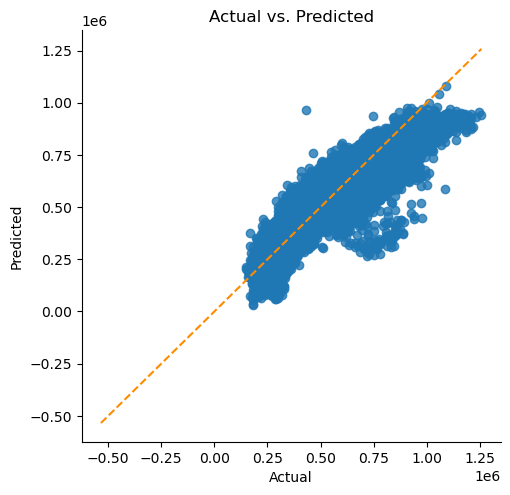

In [20]:
linear_assumption(lr, ss.transform(X), Y )

### (I) Independence - independence of the sample data
> By assumption of this the data source, the sample data is indenpent from one another

### (N) Normality - the error terms of the model are normally distributed. 
> The residuals (i.e. error terms) is normally distributed

<Axes: xlabel='Residuals', ylabel='Count'>

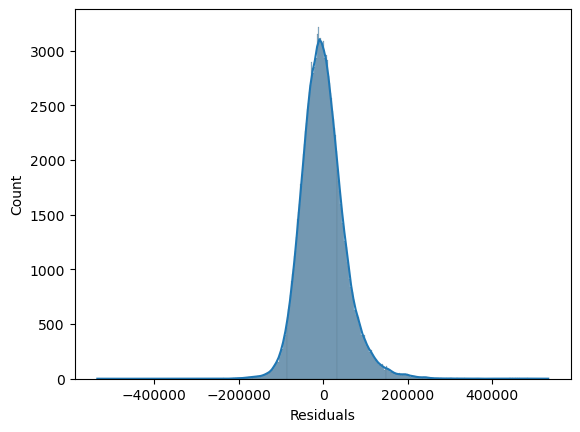

In [21]:
df_results = calculate_residuals(lr, ss.transform(X), Y )
sns.histplot(df_results['Residuals'], kde=True)

### (E) Equal Variances (i.e. Homoscedasticity) - same variance within the error terms. 
> The residual plot shows uniform variance across the residuals. 

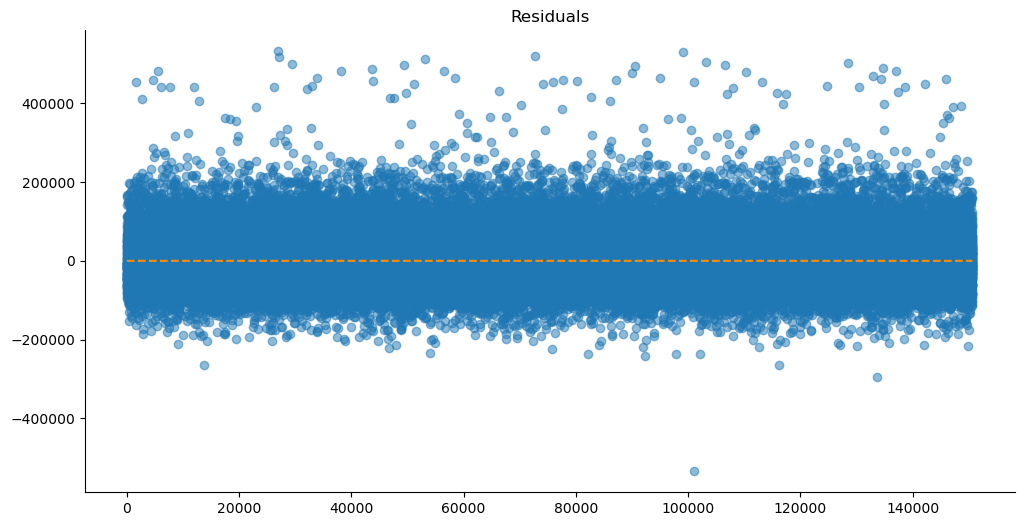

In [22]:
homoscedasticity_assumption(lr, ss.transform(X), Y)

---
# Model Fitting


In [23]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [24]:
lr_train_score = lr.score(X_train_sc, y_train)
lr_test_score = lr.score(X_test_sc, y_test)

print(f"LR - Train score = {lr_train_score} , Test Score = {lr_test_score}")

LR - Train score = 0.8659132140518364 , Test Score = 0.8653429799279503


In [25]:
# Evaluate the model
Y_predict = lr.predict(ss.transform(X))
print(f"MSE (Y, Y_Predict) = ",metrics.mean_squared_error(Y, Y_predict, squared=False) )

MSE (Y, Y_Predict) =  52497.814640379576


In [26]:
with open ('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

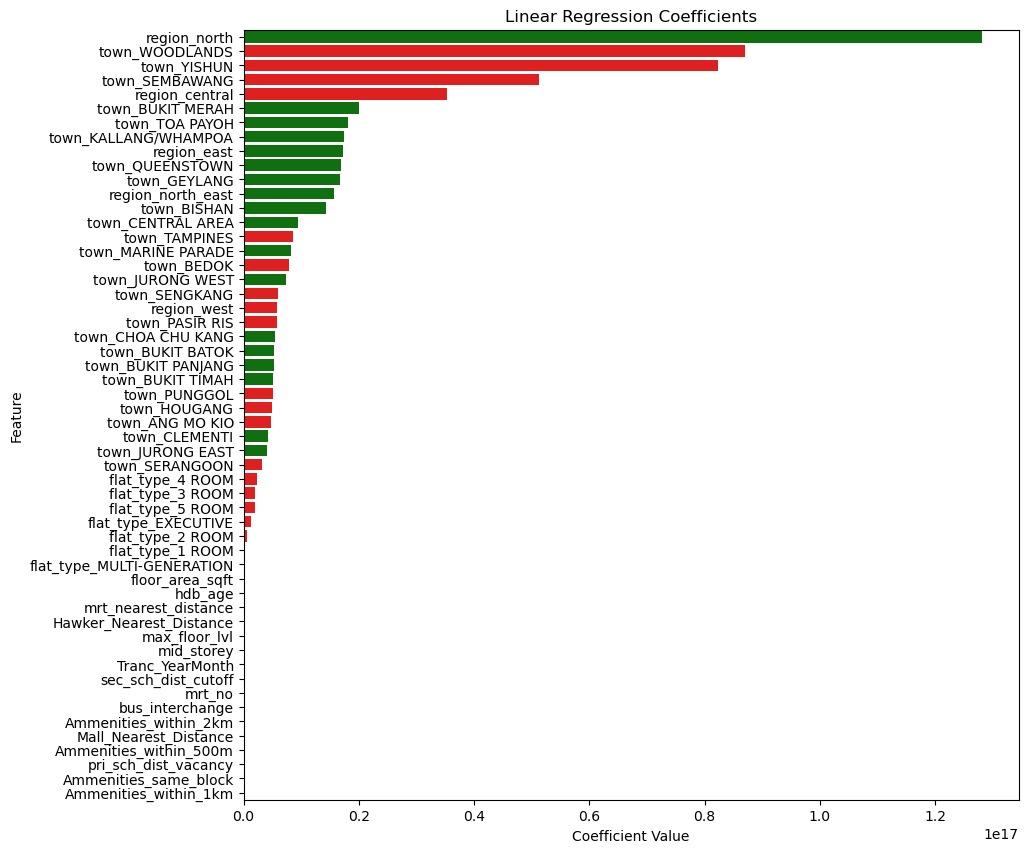

In [28]:
coefficient_df = pd.DataFrame()
coefficient_df['Column_Name'] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)
coefficient_df['abs_Coefficient_Value'] = abs(coefficient_df['Coefficient_Value'])
coefficient_df = coefficient_df.sort_values(by='abs_Coefficient_Value', ascending=False)
#coefficient_df.plot.barh(figsize=(10,20), x='Column_Name', y='abs_Coefficient_Value')
plt.figure(figsize=(10, 10))
top_coefficient_df = coefficient_df
top_coefficient_df['Color'] = ['green' if coef > 0 else 'red' for coef in top_coefficient_df['Coefficient_Value']]
sns.barplot(x='abs_Coefficient_Value', y='Column_Name', data=top_coefficient_df, palette=top_coefficient_df['Color'], orient='h')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
coefficient_df